# Document Classificaion
## Khoula Al Kharusi
## COMP6602: Machine Learning I 

In [1]:
from nltk.corpus import stopwords
import nltk

stop_words = stopwords.words('english')
prt = nltk.stem.PorterStemmer()

def preprocess(document_path):
    
    with open(document_path, 'r') as file:
        document = file.read()
    
    tokens = nltk.word_tokenize(document)

    tokens_pun_lower = [i.lower() for i in tokens if i.isalnum()]

    tokens_stop = [i for i in tokens_pun_lower if i not in stop_words]

    terms = [prt.stem(i) for i in tokens_stop]
    
    return " ".join(terms)

In [2]:
def onehot_encoder(c, classesList):
    encoded = [0 for _ in range(len(classesList))]
    encoded[classesList.index(c)] = 1
    return encoded


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

Data = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        doc_class = filename.split('_')[0].lower()
        doc_titles = filename
        documents = preprocess(os.path.join(dirname, filename))
        
        Data.append([doc_titles, documents, doc_class])

df = pd.DataFrame (Data, columns = ['Title', 'Document', 'Class'])
df
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

,Title,Document,Class
0,space_73.txt,date seri link messag period post usenet group...,space
1,space_33.txt,shag rob unverzagt write articl 5apr1993180450...,space
2,space_5.txt,anyon know size cold ga roll control thruster ...,space
3,space_8.txt,nanderso norman anderson write jmcocker mitch ...,space
4,space_66.txt,recent observ taken hubbl space telescop faint...,space
...,...,...,...
995,business_79.txt,us interest rate rise expect us interest rate ...,business
996,business_61.txt,hous price drop sale slow hous price fell nove...,business
997,business_52.txt,uk economi face uk manufactur sector continu f...,business
998,business_13.txt,industri reviv hope japan japanes industri gro...,business


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1000 non-null   object
 1   Document  1000 non-null   object
 2   Class     1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [5]:
classesList = df['Class'].unique()
classesList

array(['space', 'politics', 'sport', 'technologie', 'historical',
       'medical', 'graphics', 'entertainment', 'food', 'business'],
      dtype=object)

In [6]:
df['Class'] = pd.factorize(df['Class'])[0]
df

,Title,Document,Class
0,space_73.txt,date seri link messag period post usenet group...,0
1,space_33.txt,shag rob unverzagt write articl 5apr1993180450...,0
2,space_5.txt,anyon know size cold ga roll control thruster ...,0
3,space_8.txt,nanderso norman anderson write jmcocker mitch ...,0
4,space_66.txt,recent observ taken hubbl space telescop faint...,0
...,...,...,...
995,business_79.txt,us interest rate rise expect us interest rate ...,9
996,business_61.txt,hous price drop sale slow hous price fell nove...,9
997,business_52.txt,uk economi face uk manufactur sector continu f...,9
998,business_13.txt,industri reviv hope japan japanes industri gro...,9


In [7]:
df.info()
df.groupby('Class').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1000 non-null   object
 1   Document  1000 non-null   object
 2   Class     1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


,Title,Document
Class,,
0,100,100
1,100,100
2,100,100
3,100,100
4,100,100
5,100,100
6,100,100
7,100,100
8,100,100


In [8]:
# shuffle the DataFrame rows
df_s = df.sample(frac = 1, ignore_index = True)
X = df_s['Document']
y = df_s['Class']
df_s

,Title,Document,Class
0,entertainment_77.txt,de niro film lead us box offic film star rober...,7
1,entertainment_89.txt,film star fox behind theatr bid lead actor edw...,7
2,historical_74.txt,first intermedi period bc main articl first in...,4
3,entertainment_67.txt,johnni depp act outlaw johnni depp whose lates...,7
4,graphics_76.txt,easi photo calendar make softwar graphic desig...,6
...,...,...,...
995,medical_694.txt,articl 1rhfrkinn816 nodrog gordon rubenfeld wr...,5
996,graphics_4.txt,hello look add voic input capabl user interfac...,6
997,graphics_96.txt,anyon success convert interleaf graphic cgm ev...,6
998,technologie_2.txt,china net cafe cultur crackdown chines author ...,3


In [9]:
#split test train
X_train = []
y_train = []
X_test = []
y_test = []
classTest = [0]*len(classesList)
for i in range (len(y)):
    if classTest[y[i]] < 20:
        X_test.append(X[i])
        y_test.append(y[i])
        classTest[y[i]] += 1
    else:
        X_train.append(X[i])
        y_train.append(y[i])
print(classTest)
for i in range(10):
    print(X_train[i], y_train[i])

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
3 tablespoon oil 1 teaspoon cornstarch 1 pound boneless chicken breast teaspoon ground ginger cup broccoli foret 1 cup water 2 ounc snow pea c 2 teaspoon import soy sauc 1 med carrot thinli slice 1 teaspoon white rice vinegar med red green pepper hot cook rice 1 env golden onion soup mix chicken breast cut thin strip sweet pepper cut thin strip larg skillet heat oil cook chicken veget high heat stir constantli 10 minut chicken golden veget thoroughli blend golden onion recip soup mix cornstarch ginger water soy sauc vinegar stir chicken mixtur bring boil simmer uncov minut sauc thicken serv hot rice garnish desir slice green onion toast sesam seed microwav direct omit oil degreas ginger casserol heat chicken uncov high full power 4 minut almost done remov chicken drain add veget casserol heat uncov 5 minut high full power thoroughli blend golden onion soup mix cornstarch ginger water soy sauc vinegar stir veget heat uncov 5 minut high full power

## Vectorize Documents

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 500)
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec.shape

(800, 500)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [12]:
import warnings
warnings.filterwarnings('ignore')
grid={"C":[0.1, 1, 10, 100, 1000], "penalty":['none',"l1","l2", 'elasticnet'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_vec,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.9424999999999999


In [13]:
lr = LogisticRegression(C = 10, penalty = 'l2', solver = 'newton-cg')
lr.fit(X_train_vec,y_train)
y_pred = lr.predict(X_test_vec)
y_score = lr.predict_proba(X_test_vec)
y_score[:10]

array([[1.18465463e-02, 3.52589102e-03, 9.24155054e-03, 5.92410705e-03,
        6.24302802e-03, 7.40851412e-03, 5.46120037e-03, 9.37313496e-01,
        5.00250972e-03, 8.03315731e-03],
       [3.54682811e-02, 1.40040588e-01, 2.91399855e-02, 1.65271734e-01,
        2.31357639e-02, 1.65018569e-02, 7.68945386e-03, 3.71922650e-01,
        7.36396937e-03, 2.03465718e-01],
       [1.01726277e-02, 4.65547704e-03, 3.25734794e-03, 7.65747218e-03,
        9.59589518e-01, 2.68106366e-03, 1.54903341e-03, 2.07750228e-03,
        2.41573366e-03, 5.94422398e-03],
       [1.06385482e-03, 5.10475403e-04, 1.46745564e-03, 1.56525171e-03,
        1.00598640e-03, 8.72614035e-04, 9.40590211e-04, 9.91846549e-01,
        4.21875328e-04, 3.05347183e-04],
       [5.39803671e-03, 9.59842527e-04, 2.03120484e-03, 8.97212066e-03,
        1.24921492e-03, 2.43380531e-03, 9.75469922e-01, 9.09415550e-04,
        1.77113708e-03, 8.05300086e-04],
       [2.10195102e-02, 5.12243591e-03, 2.25334959e-03, 3.91657643e-03,
   

In [14]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, precision_score
print('Logistic Regression Classification Evaluation')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None))
print('Recall:', recall_score(y_test, y_pred, average=None))
print('f1-score:', f1_score(y_test, y_pred, average=None))

Logistic Regression Classification Evaluation
Accuracy: 0.96
Precision: [0.94444444 0.95238095 1.         0.95238095 1.         0.9047619
 0.9        1.         0.95       1.        ]
Recall: [0.85 1.   1.   1.   0.95 0.95 0.9  1.   0.95 1.  ]
f1-score: [0.89473684 0.97560976 1.         0.97560976 0.97435897 0.92682927
 0.9        1.         0.95       1.        ]


In [15]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[17  1  0  0  0  0  2  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  1 19  0  0  0  0  0]
 [ 1  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0  1 18  0  1  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  1  0  0 19  0]
 [ 0  0  0  0  0  0  0  0  0 20]]


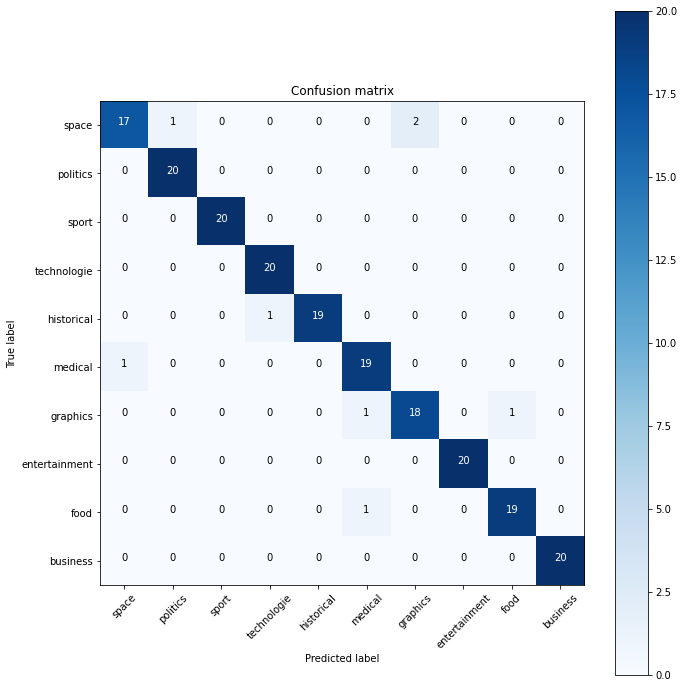

In [16]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred,labels=list(range(10)))
# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes=classesList,
                      title='Confusion matrix')

In [17]:
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Binarize the output
y_train_hot = label_binarize(y_train, classes=list(range(10)))
y_test_hot = label_binarize(y_test, classes=list(range(10)))

n_classes = y_test_hot.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    LogisticRegression(C = 10, penalty = 'l2', solver = 'liblinear')
)
y_score = classifier.fit(X_train_vec,y_train_hot).decision_function(X_test_vec)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_hot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_hot.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

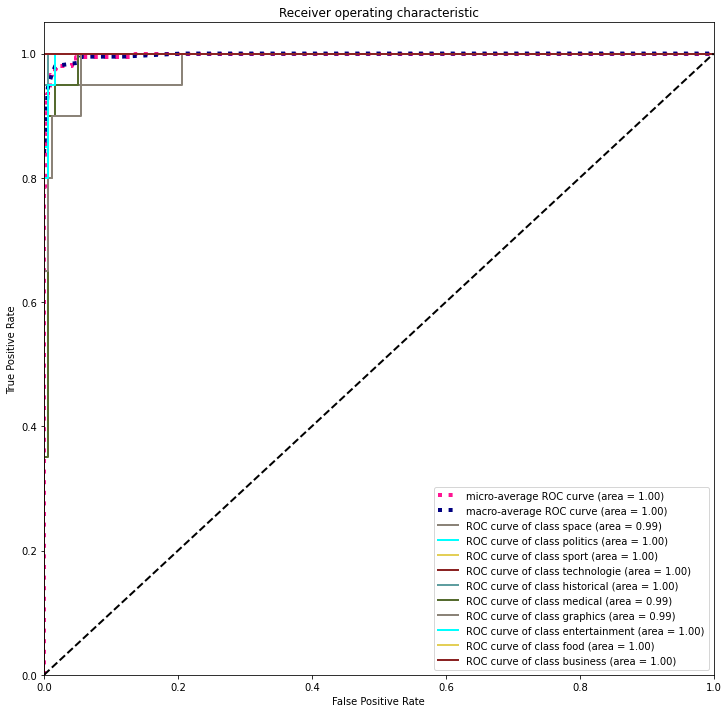

In [18]:
# n_classes = 10
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 12))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(['#8B8378', '#00FFFF', '#E3CF57', '#8B2323', '#5F9EA0', '#556B2F'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classesList[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [19]:
roc_auc_score(y_test_hot, y_score)

0.9971111111111112

## SVM

In [20]:
from sklearn.svm import SVC
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
grid = {'C': [0.1, 1, 10, 100, 1000],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['linear','rbf', 'poly', 'sigmoid']
       }
svm =SVC()
svm_cv=GridSearchCV(svm,grid,cv=10)
svm_cv.fit(X_train_vec,y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
accuracy : 0.9425000000000001


In [21]:
svc =SVC(C = 1, gamma = 'scale', kernel = 'linear')
svc.fit(X_train_vec,y_train)
y_pred = svc.predict(X_test_vec)
print('Support Vector Machine Classification Evaluation')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average=None))
print('Recall:', recall_score(y_test, y_pred, average=None))
print('f1-score:', f1_score(y_test, y_pred, average=None))

Support Vector Machine Classification Evaluation
Accuracy: 0.965
Precision: [0.94444444 0.95238095 1.         0.90909091 1.         0.9047619
 0.94736842 1.         1.         1.        ]
Recall: [0.85 1.   1.   1.   0.95 0.95 0.9  1.   1.   1.  ]
f1-score: [0.89473684 0.97560976 1.         0.95238095 0.97435897 0.92682927
 0.92307692 1.         1.         1.        ]


Confusion matrix, without normalization
[[17  1  0  0  0  1  1  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  1 19  0  0  0  0  0]
 [ 1  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  1  0  1 18  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  0 20]]


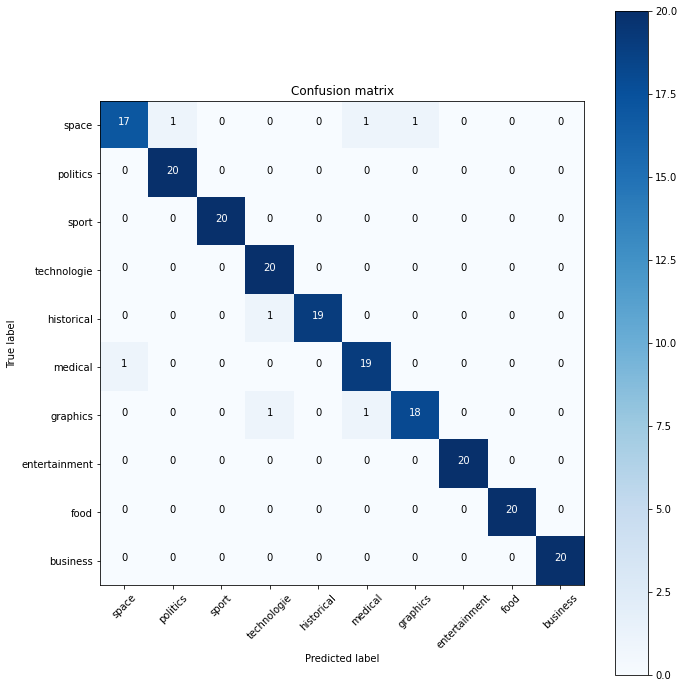

In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred,labels=list(range(10)))
# Plot non-normalized confusion matrix
plt.figure(figsize = (10, 10))
plot_confusion_matrix(cnf_matrix, classes=classesList,
                      title='Confusion matrix')

In [23]:
# Binarize the output
y_train_hot = label_binarize(y_train, classes=list(range(10)))
y_test_hot = label_binarize(y_test, classes=list(range(10)))

n_classes = y_test_hot.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    SVC(C = 100, gamma = 0.1, kernel = 'rbf')
)
y_score = classifier.fit(X_train_vec,y_train_hot).decision_function(X_test_vec)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_hot[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_hot.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

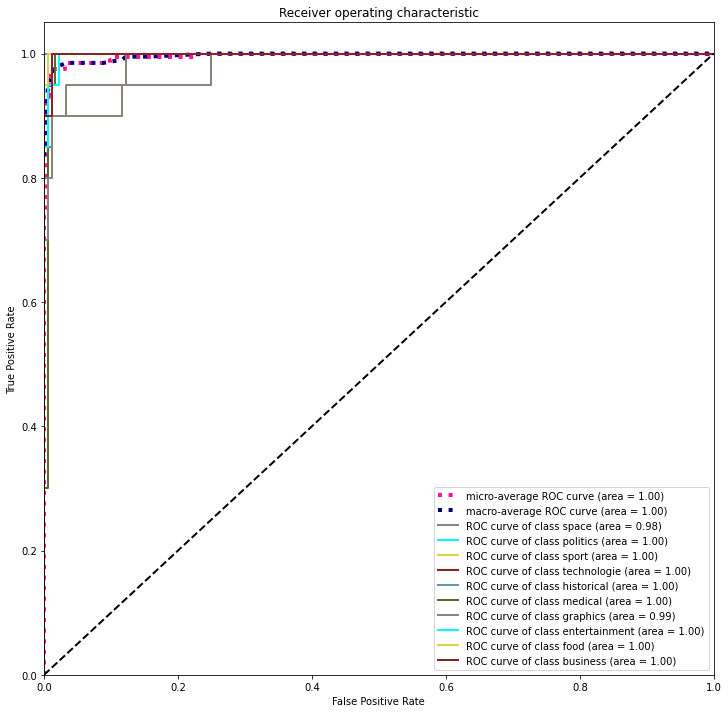

In [24]:
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 12))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(['#8B8378', '#00FFFF', '#E3CF57', '#8B2323', '#5F9EA0', '#556B2F'])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(classesList[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [25]:
roc_auc_score(y_test_hot, y_score)

0.9963055555555556